# Logistic Regression From Scratch

In [102]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("dark_background")
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


# types: for better functions
from numpy.typing import NDArray
from typing import Any

## Implementation Code

In [103]:
class LogisticRegression:
    """implement logistic regression from scratch"""

    def __init__(
        self, learning_rate: float = 0.001, epochs: int = 500, classes: int = 2
    ) -> None:
        # initializing model & hyper parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.no_of_classes = classes
        self.bias = None
        self.weight = None

    def linear_equation(
        self, x: NDArray[np.float64], w: NDArray[np.float64], b: float | NDArray
    ) -> NDArray:
        # equation: z = w . x + b
        if x.shape[1] != w.shape[0]:
            raise ValueError("X and W are mismatched column count")

        return np.dot(x, w) + b

    @staticmethod
    def sigmoid(z: NDArray) -> NDArray:
        # equation: sigmoid(z) = 1 / 1 + e ^ -z
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def softmax(z: NDArray[float]) -> NDArray:
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
        return exp_z / exp_z.sum(axis=1, keepdims=True)
    
    # @staticmethod
    # def softmax(z: NDArray[float]) -> NDArray:
    #     # equation: softmax(z) = e^z / sum(e^z)
    #     sum_of_exp = sum([np.exp(each) for each in z])

    #     result = [np.round(np.exp(each, keepdims=True) / sum_of_exp, 5) for each in z]
    #     return np.array(result)

    def get_dw(
        self, y_true: NDArray[int], y_prob: NDArray[float], x: NDArray[float]
    ) -> float:
        """generate partial derivative of loss with respect to weight

        Equation:
            dw = 1/n . y_prob_i - y_true_i . x_i
        """
        if self.no_of_classes > 2:
            result = []
            for yp_i, y_i, x_i in zip(y_prob, y_true, x):
                error = np.array(yp_i) - np.array(y_i)
                result.append(np.outer(error, x_i))
            return np.mean(result)

        error = y_prob - y_true
        dw = []
        for each in x.T:
            result = np.mean([np.round(a * b, 3) for a, b in zip(error, each)])
            dw.append(result)
        return np.array(dw)

    @staticmethod
    def get_db(y_true: NDArray[int], y_prob: NDArray[float]) -> float:
        error = y_prob - y_true
        return np.mean(error)

    def update_params(
        self, y_prob: NDArray, y_true: NDArray, x: NDArray
    ) -> tuple[float, float]:
        # @Returns: (weight, bias)
        new_weight = self.weight - (
            self.learning_rate * self.get_dw(y_prob=y_prob, y_true=y_true, x=x)
        )
        new_bias = self.bias - (
            self.learning_rate * self.get_db(y_prob=y_prob, y_true=y_true)
        )
        return (new_weight, new_bias)

    def forward_prop(self, x: NDArray) -> Any:
        logits = self.linear_equation(x=x, w=self.weight, b=self.bias)
        return self.softmax(logits) if self.no_of_classes > 2 else self.sigmoid(logits)

    def backward_prop(self, y_prob: NDArray, y_true: NDArray, x: NDArray) -> Any:
        self.weight, self.bias = self.update_params(y_prob=y_prob, y_true=y_true, x=x)

    def fit(self, x: NDArray[np.float64], y: NDArray[np.int16]) -> Any:

        self.weight = (
            np.random.randn(x.shape[1]) * 0.01
            if self.no_of_classes <= 2
            else np.random.randn(x.shape[1], self.no_of_classes) * 0.01
        )
        self.bias = 0 if self.no_of_classes <= 2 else np.zeros(self.no_of_classes)

        for _ in range(self.epochs):
            prob = self.forward_prop(x=x)
            self.backward_prop(x=x, y_prob=prob, y_true=y)

        print("training completed")

    def predict(self, x: np.ndarray) -> Any:
        pred_logits = self.linear_equation(x=x, w=self.weight, b=self.bias)

        if self.no_of_classes > 2:
            pred_prob = self.softmax(pred_logits)
            # result = list(map(lambda x: 1 if x > .5 else 0, pred_prob))
            return np.array(pred_prob)

        pred_prob = self.sigmoid(pred_logits)
        result = list(map(lambda x: 1 if x > 0.5 else 0, pred_prob))
        return np.array(result)

## Binary Class Classification

In [104]:
bin_raw_x, bin_raw_y = make_classification(
    n_features=10, n_samples=1000, random_state=3442
)

In [105]:
print(f"Shape of binary classification data: {bin_raw_x.shape, bin_raw_y.shape}")

Shape of binary classification data: ((1000, 10), (1000,))


In [106]:
x_train, x_test, y_train, y_test = train_test_split(
    bin_raw_x, bin_raw_y, random_state=3453, test_size=0.2
)
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((800, 10), (800,)), ((200, 10), (200,)))

In [107]:
b_model = LogisticRegression()

b_model.fit(x=x_train, y=y_train)

training completed


In [108]:
print(f"model parameters: \nweight:: {b_model.weight}\nbias:: {b_model.bias}")

model parameters: 
weight:: [-0.01518978  0.21085588  0.13368022  0.02092004 -0.01397379  0.00242672
  0.00219227 -0.00259479  0.01111791 -0.00634287]
bias:: 0.004703916483952396


In [109]:
y_pred = b_model.predict(x=x_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [110]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cm_values = confusion_matrix(y_test, y_pred)

In [111]:
tn, fp, fn, tp

(np.int64(104), np.int64(2), np.int64(12), np.int64(82))

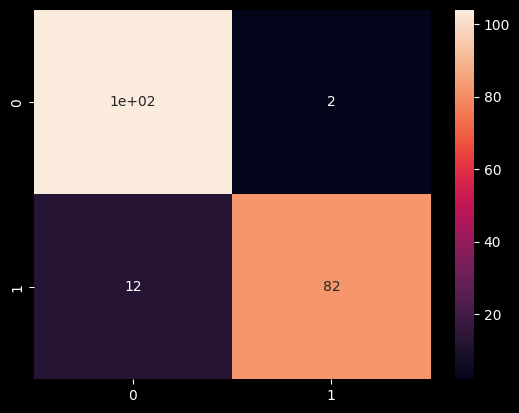

In [112]:
sns.heatmap(cm_values, annot=True)
plt.show()

In [113]:
test_acc = accuracy_score(y_test, y_pred) * 100    # test accuracy

y_pred_train = model.predict(x_train)
train_acc = accuracy_score(y_train, y_pred_train) * 100   # train accuracy

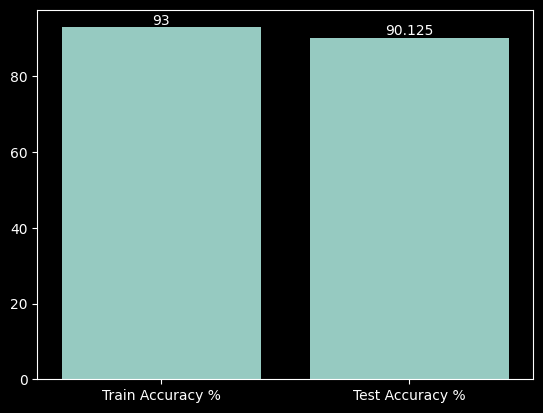

In [114]:
ax = sns.barplot([test_acc, train_acc])
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1], ["Train Accuracy %", "Test Accuracy %"])
plt.show()

## Multi Class Classification

In [115]:
multi_raw_x, multi_raw_y = make_classification(
    n_features=10, n_samples=1000, random_state=3442, n_classes=4, n_informative=4
)

In [116]:
print(
    f"Shape of multiclass classification data: {multi_raw_x.shape, multi_raw_y.shape}"
)

Shape of multiclass classification data: ((1000, 10), (1000,))


In [117]:
# encode the target varibale with one-hot encoding 
# e.g. [0,1] => [[1,0], [0, 1]]

oe = OneHotEncoder()
value = oe.fit_transform(multi_raw_y.reshape(-1, 1))
encoded_y = value.toarray()
encoded_y

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [118]:
m_x_train, m_x_test, m_y_train, m_y_test = train_test_split(
    multi_raw_x, encoded_y, random_state=3453, test_size=0.2
)
(m_x_train.shape, m_y_train.shape), (m_x_test.shape, m_y_test.shape)

(((800, 10), (800, 4)), ((200, 10), (200, 4)))

In [119]:
m_model = LogisticRegression(classes=4)
m_model.fit(m_x_train, m_y_train)

training completed


In [120]:
print(f"model parameters: \nweight:: {m_model.weight}\nbias:: {m_model.bias}")
# TODO: update get_db

model parameters: 
weight:: [[ 0.00264232  0.00430293  0.0179983   0.00992527]
 [ 0.00368799  0.00297036  0.01646875  0.00046369]
 [ 0.0147809  -0.00881476  0.00962847  0.0028395 ]
 [-0.01256348 -0.00253272 -0.00123925 -0.00013097]
 [-0.00923913 -0.00777764 -0.00751019  0.01099954]
 [ 0.00420574  0.00313536 -0.01360203 -0.02519725]
 [-0.01252365  0.00689075  0.00502125 -0.00520124]
 [-0.03335276  0.01030364 -0.01635472 -0.00324882]
 [ 0.00997786  0.01228707  0.00707471 -0.00555447]
 [-0.00093285 -0.01525227  0.01259852  0.00708849]]
bias:: [6.24500451e-19 6.24500451e-19 6.24500451e-19 6.24500451e-19]
